![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [24]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


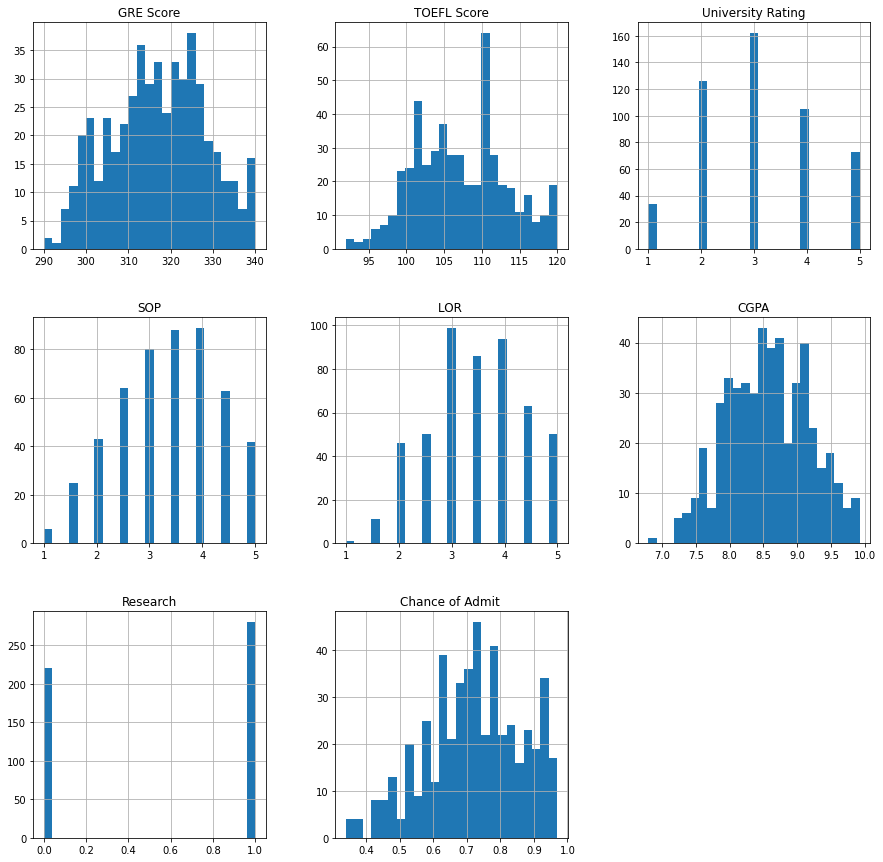

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [25]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [26]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

Se incluye un random seed para garantizar replicabilidad del código, auque no es 100% seguro que se pueda logarar en todas las ejecuciones.

In [27]:
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(1)

In [28]:
# Celda 1

# escalando variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

xTrain = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

xTrain = np.array(xTrain)
yTrain = np.array(yTrain)

xTest = np.array(xTest)
yTest = np.array(yTest)


# definiendo dimensiones de entrada y salida

input_dims = xTrain.shape[1]
otuput_dims = 1

# implementando red neuronal
from keras import backend as K

K.clear_session()
model = Sequential()
model.add(Dense(otuput_dims,input_shape=(input_dims,)))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
from livelossplot import PlotLossesKeras
model.compile(optimizer="adam",loss="mean_squared_error" ,metrics=['mean_squared_error', 'mean_absolute_error'])

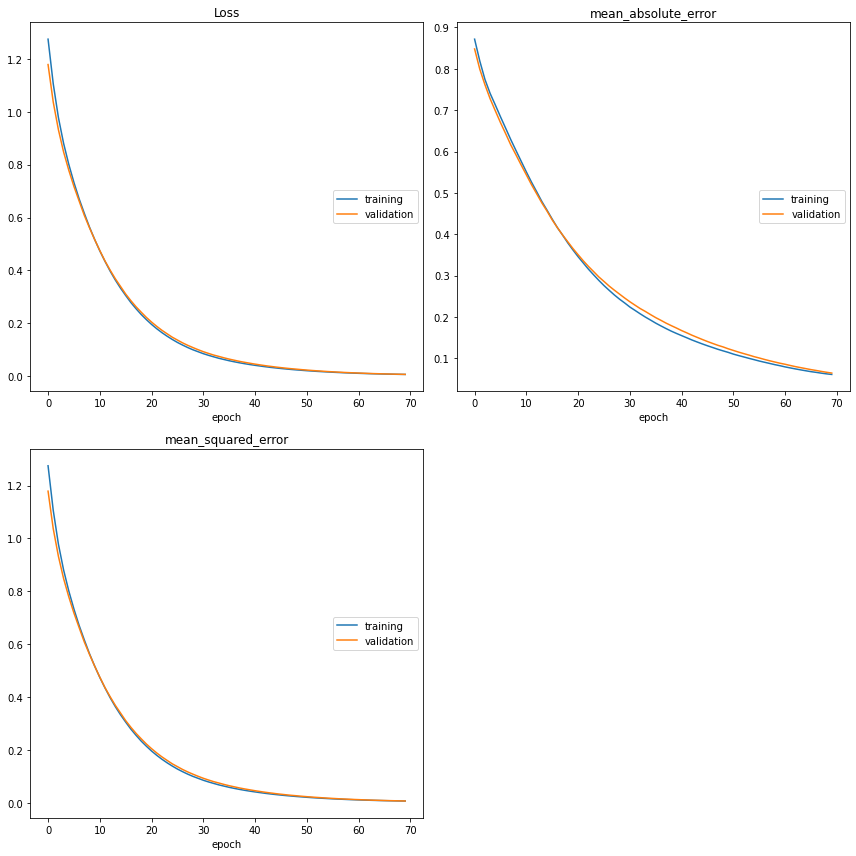

Loss
	training         	 (min:    0.007, max:    1.275, cur:    0.007)
	validation       	 (min:    0.007, max:    1.179, cur:    0.007)
mean_absolute_error
	training         	 (min:    0.061, max:    0.872, cur:    0.061)
	validation       	 (min:    0.064, max:    0.848, cur:    0.064)
mean_squared_error
	training         	 (min:    0.007, max:    1.275, cur:    0.007)
	validation       	 (min:    0.007, max:    1.179, cur:    0.007)
35/35 [==============================] - 1s 42ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - mean_absolute_error: 0.0612 - val_loss: 0.0069 - val_mean_squared_error: 0.0069 - val_mean_absolute_error: 0.0645


In [30]:
model.fit(x=xTrain,
          y=yTrain,
          verbose=1,
          batch_size=10,
          epochs=70,
          validation_data=(xTest,yTest),
          callbacks=[PlotLossesKeras()])

El punto solicita la resolución de los siguientes requrimientos:

1. cree una red neuronal de una sola capa y decida justificando su elección, el optimizador, la función de pérdida y el numero de epochs.

Dando respuesta a esta solicitud se selecciono la función de perdida como el **mse** debido a que es la métrica de uso recurrente en la evaluación de modelos de regresión, adicionalmente, esta métrica le otorga un mayor castigo a los errorers de gran magnitud por lo que en esta ocasión nos interesaria esa aproximación debido a la naturaleza de la variable regresada.

Del lado del optimizador se selecciono el optimizador **adam**, en este sentido el rendimiento por defecto del optimizador seleccionado es en términos generales mucho mejor en términos de memoria y mejora de convergencia, auqnue en términos de generalización, en la teoría, el método sgd posee mejor desempeño.

El numero de epochs se selecciono como 70 debido a que la convergencia de la función de perdida en su valor usual que es 50, no pareceia generar un panorama que permitiera validar graficamente que allí se generaba el aplanamiento de la función de pérdida. En este sentido se puede observar que un numero de epochs de 50 sugiere un valor adecuado para este parametro.

Finalmente, al analizar los resultados de las métricas solicitadas se puede observar valores en training de **mse = 0.0067**, **mae = 0.0612** y en validación **mse = 0.0069**, **mae = 0.0645**, lo anterior nos sugiere que no existen problemas de sobre ajuste debido a las pequeñas diferencias presentadas entre las métricas de train y test

Por último es importante resaltar que se escogio la activación tipo relu ya que esta no permite valores negativos, lo que va acorde con los datos de la variable output que representa probabilidades, y no pueden ser negativas. esto será aplicable para todos los puntos posteriores.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [31]:
# Celda 2
from keras.layers import Activation
K.clear_session()
model = Sequential()
model.add(Dense(245, input_shape=(input_dims,),activation='relu'))
model.add(Dense(245,activation='relu'))
model.add(Dense(otuput_dims))
model.add(Activation('relu'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 245)               1960      
                                                                 
 dense_1 (Dense)             (None, 245)               60270     
                                                                 
 dense_2 (Dense)             (None, 1)                 246       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 62,476
Trainable params: 62,476
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
model.compile(optimizer="adam",loss="mean_squared_error" ,metrics=['mean_squared_error', 'mean_absolute_error'])

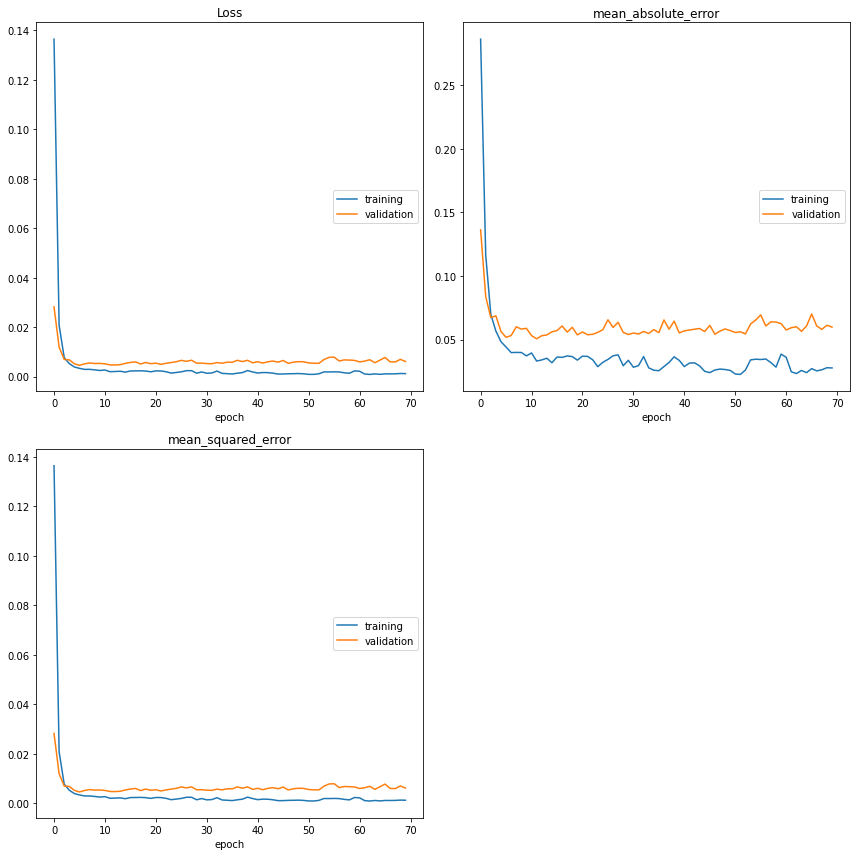

Loss
	training         	 (min:    0.001, max:    0.136, cur:    0.001)
	validation       	 (min:    0.005, max:    0.028, cur:    0.006)
mean_absolute_error
	training         	 (min:    0.023, max:    0.286, cur:    0.028)
	validation       	 (min:    0.051, max:    0.136, cur:    0.060)
mean_squared_error
	training         	 (min:    0.001, max:    0.136, cur:    0.001)
	validation       	 (min:    0.005, max:    0.028, cur:    0.006)
35/35 [==============================] - 3s 74ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0276 - val_loss: 0.0062 - val_mean_squared_error: 0.0062 - val_mean_absolute_error: 0.0597


In [33]:
model.fit(x=xTrain,
          y=yTrain,
          verbose=1,
          batch_size=10,
          epochs=70,
          validation_data=(xTest,yTest),
          callbacks=[PlotLossesKeras()])

Genralidades de este punto.

**Se seleccionan los mismos parametros, loss function, optimizer y epochs del punto anterior, lo anterior con el objetivo de realizar una comparación uniforme entre ambos modelos. Adicionalmente es importante resaltar que en el taller de ejemplo, se subdividio el juego de entrenamiento y de test nuevamente, dado a que no es algo imprescindible para la ejecución del ejercicio no se realizo, por otra parte, esto podría ser ejecutado con el argumento validation_split de la funcion fit**

El numero de neuronas se establece como el 70% del total de los datos de entrenamiento, este es un hyperparametro que debe ser ajustable, pero para este caso particular se decidio emular el criterio de selección de train test split, utilizando 245 neuronas. 

Al observar los resultados gráficos podemos observar de antemano lo que las métricas mse y mae nos dicen, el resultado es que aumentar la complejidad del modelo implica un overfitting, esto es evidente de dos formas, el gap presentado en los graficos entre las curvas de validación y test, o la diferencia entre el valor de las métricas entre los conjuntos de entrenamiento y test, **mse train = 0.0012**, **mae train = 0.0276**, **mse test = 0.0062**, **mae train = 0.0597**  



## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [34]:
# Celda 3
K.clear_session()
model = Sequential()
model.add(Dense(245, input_shape=(input_dims,),activation='relu'))
model.add(Dense(245,activation='relu'))
model.add(Dense(122,activation='relu'))
model.add(Dense(otuput_dims))
model.add(Activation('relu'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 245)               1960      
                                                                 
 dense_1 (Dense)             (None, 245)               60270     
                                                                 
 dense_2 (Dense)             (None, 122)               30012     
                                                                 
 dense_3 (Dense)             (None, 1)                 123       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 92,365
Trainable params: 92,365
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
model.compile(optimizer="adam",loss="mean_squared_error" ,metrics=['mean_squared_error', 'mean_absolute_error'])

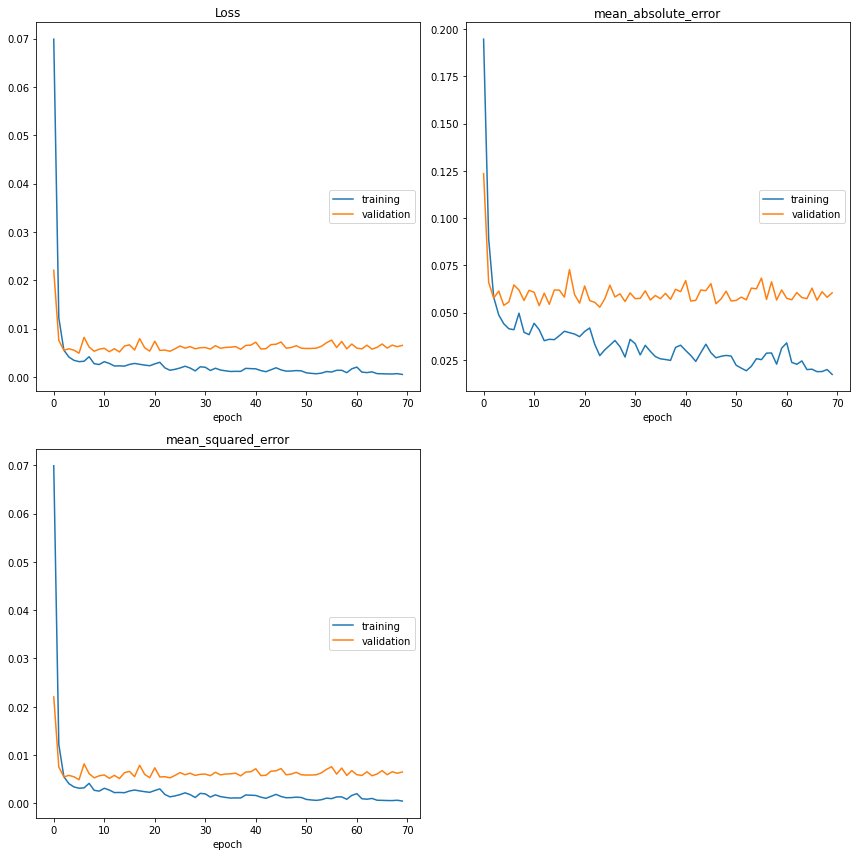

Loss
	training         	 (min:    0.000, max:    0.070, cur:    0.000)
	validation       	 (min:    0.005, max:    0.022, cur:    0.007)
mean_absolute_error
	training         	 (min:    0.017, max:    0.195, cur:    0.017)
	validation       	 (min:    0.053, max:    0.124, cur:    0.060)
mean_squared_error
	training         	 (min:    0.000, max:    0.070, cur:    0.000)
	validation       	 (min:    0.005, max:    0.022, cur:    0.007)
35/35 [==============================] - 2s 49ms/step - loss: 4.9774e-04 - mean_squared_error: 4.9774e-04 - mean_absolute_error: 0.0173 - val_loss: 0.0065 - val_mean_squared_error: 0.0065 - val_mean_absolute_error: 0.0605


In [36]:
model.fit(x=xTrain,
          y=yTrain,
          verbose=1,
          batch_size=10,
          epochs=70,
          validation_data=(xTest,yTest),
          callbacks=[PlotLossesKeras()])

**Se seleccionan los mismos parametros, loss function, optimizer y epochs del punto anterior, lo anterior con el objetivo de realizar una comparación uniforme entre ambos modelos. Adicionalmente es importante resaltar que en el taller de ejemplo, se subdividio el juego de entrenamiento y de test nuevamente, dado a que no es algo imprescindible para la ejecución del ejercicio no se realizo, por otra parte, esto podría ser ejecutado con el argumento validation_split de la funcion fit**

Aclarado lo anterior se decide agregar una capa adicional al modelo anterior, es decir red neuronal con tres capas de activacion relu con 122 neuronas que equivales al 35% de los datos de entrenamiento. Aquí es importante resaltar un comportamiento casi intuitivo y consecuente con los resultados del punto anterior, a medida que aumento la complejidad de la red, esta tenderá a tener mayor overfiting, esto es un tema que deberá ser tratado mediante la inclusión de capas tipo dropout y optimización de hyperparametros, en términos generales aunque se presente overfiting, este modelo presenta mejor resultado en términos de métricas que el modelo 1, pero peor desempeño comparado con el modelo 2.

**mse train = 4.9774e-04**

**mae train = 0.0173**

**mse test = 0.0065**

**mae test = 0.605**


## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

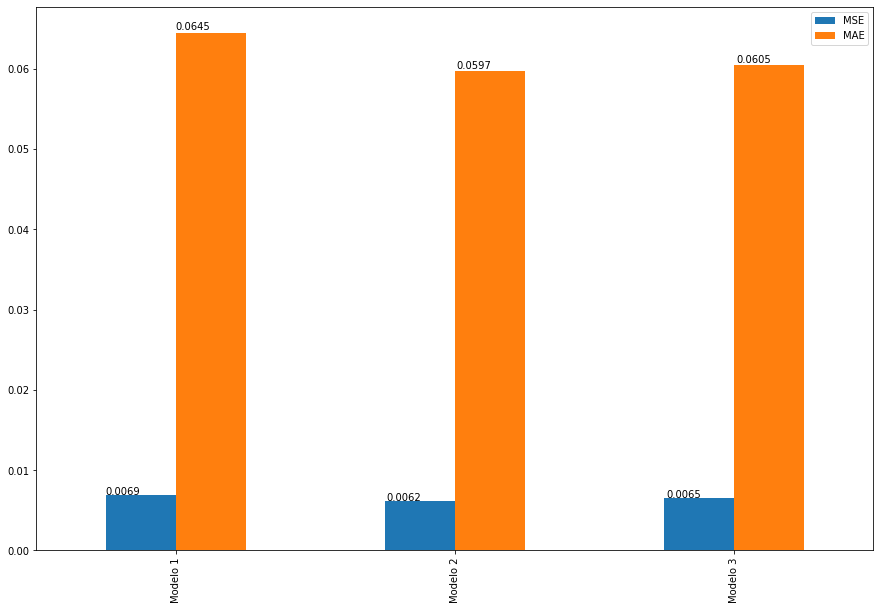

In [44]:
# Celda 4
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
# Se compararán la metricas obtenidas para el conjunto de validación

datos = [[0.0069,0.0645],[0.0062,0.0597],[0.0065,0.0605]]
df = pd.DataFrame(datos, columns=["MSE","MAE"], index=["Modelo 1","Modelo 2","Modelo 3"])

ax = df.plot(kind="bar", figsize=(15,10))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


Lo primero que se puede resaltar es que las diferencias de métricas entre modelos no presenta una variación que se pueda destacar como significativa, aunque si hay diferencias entre ellos.

El modelo 2 es el que presenta el mejor resultado a nivel de desempeño de métricas, y aunque no se nos pide mencionar desventajas nos parece importante resaltar que al aumentar la complejidad del modelo el overfiting aparece en escena, lo anterior no necesariamente es una desventaja, más bien permite el desarrollo de un mejor poder predictivo, en efecto algunos resultados empiricos demuestran que tener capas ocultas mayores que uno aumentan el desempeño de la red, no olvidadndo tener siempre a la vista el trade off esntre costo computacional sumado al overfitting, realizando la salvedad anterior, el modelo del punto 2 tiene  una ventaja respecto al modelo del punto 1, al tener una mayor complejidad que a su vez permite un mejor poder predictivo, en otras palabras, el modelo esta en capacidad de aprender de interacciones más complejas entre las variables  . 

Por otra parte, el comportamiento de las curvas de la función de perdida, si se tiene en cuenta este factor en el modelo 1, dado a su comportamiento y segun la teoria es el que presenta el mejor ajuste, aunque en términos de métricas es el que presenta el desempeño más bajo, lo anterior puede atribuirse a que, aunque la curva de la función de pérdida mostro un buen ajuste, aún queda espacio para incluir mayor complejidad al modelo con el objetivo de mejorar el trade off entre sesgo y varianza, dicho esto se, puede decir que la desventaja del modelo del punto 1 es que sus metricas mse y mae son las más bajas debido a que una sola capa puede no contemplar la complejidad necesaria que permita un mayor poder predictivo o en otras palabras, queda el espacio para no aprender de relaciones más complejas entre variables.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9a40a44c-5762-45c3-b537-ec881fac9e69' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>